# Data Pre-processing

 - Read the dataset

In [142]:
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN 
from sklearn.neighbors import KNeighborsClassifier

# SVM 
from sklearn.svm import SVC

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

In [143]:
# import pandas
import pandas as pd # pd is an alias of pandas

In [144]:
#Read the dataset and store it in a dataframe
df = pd.read_csv('heart.csv')
# df = pd.read_excel('Absenteeism.xls',nrows = 500) # read the first 500 rows of the dataset

In [145]:

df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [146]:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [147]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    df[feature] = df[feature].map(lambda x: map_values(x, mapping))
    df[feature] = df[feature].astype(object)

In [148]:
df.head()


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [149]:
df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease
302,57,Female,Atypical angina,130,236,False,Normal,174,No,0.0,Flat,1,Reversible defect,No Disease


In [150]:
df.shape


(303, 14)

In [151]:
# settings to display all columns
pd.set_option("display.max_columns", None)
#print the shape of the dataframe; Return a tuple representing the dimensionality of the DataFrame.
#tells the number of rows and columns of a given DataFrame
print("Shape of the dataset", df.shape)
df.shape
# tuple: store multiple items; written with round brackets
#df.head() # print the first 5 instances and

Shape of the dataset (303, 14)


(303, 14)

In [152]:
#printing number of rows and number of columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])


Number of rows:  303
Number of columns:  14


In [153]:
#prints all the column names; columns is an attribute NOT a method/function
print(df.columns)
#df.columns.tolist()
#print(df.columns.tolist())

Index(['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExcerciseAngina',
       'OldPeak', 'STSlope', 'nMajorVessels', 'Thalium', 'Status'],
      dtype='object')


In [154]:
# Example of some attributes
df.dtypes # data types of ALL the features

Age                       int64
Sex                      object
ChestPain                object
RestingBloodPressure      int64
Cholesterol               int64
FastingBloodSugar        object
RestingECG               object
MaxHeartRate              int64
ExcerciseAngina          object
OldPeak                 float64
STSlope                  object
nMajorVessels             int64
Thalium                  object
Status                   object
dtype: object

In [155]:
df.ndim # prints dimension of the dataset

2

In [156]:
df.size # number of total elements in the dataset; 715 \times 21

4242

In [157]:
#printing the column names in the form of a list
col_list = [] # this is an empty list
for x in df.columns:
    col_list.append(x)
print(col_list)
col_list

['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate', 'ExcerciseAngina', 'OldPeak', 'STSlope', 'nMajorVessels', 'Thalium', 'Status']


['Age',
 'Sex',
 'ChestPain',
 'RestingBloodPressure',
 'Cholesterol',
 'FastingBloodSugar',
 'RestingECG',
 'MaxHeartRate',
 'ExcerciseAngina',
 'OldPeak',
 'STSlope',
 'nMajorVessels',
 'Thalium',
 'Status']

In [158]:
# printing Basic infos (Non-null count and data type) per feature of the dataset
print(df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB
None


In [159]:
#printing basic statistical infos per feature of the dataset
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [160]:
# prints unique values for each features
print(df['Age'].unique())
len(df['Age'].unique())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


41

In [161]:
df.max() # prints maximum values of ALL the features 
df['Age'].max() # prints maximum values of Age features
df[['Age', 'Sex']].max() # prints maximum values of Age and Seasons features
df[['Age', 'Sex', 'Status']].max() # prints maximum values of Age and Seasons features

Age               77
Sex             Male
Status    No Disease
dtype: object

In [162]:
# investigate number of null values per features 
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [163]:
duplicates = df[df.duplicated()]

# Print the duplicates
print(duplicates)

     Age   Sex         ChestPain  RestingBloodPressure  Cholesterol  \
164   38  Male  Non-anginal pain                   138          175   

    FastingBloodSugar   RestingECG  MaxHeartRate ExcerciseAngina  OldPeak  \
164             False  Abnormality           173              No      0.0   

         STSlope  nMajorVessels            Thalium         Status  
164  Downsloping              4  Reversible defect  Heart Disease  


In [164]:
# count the duplicate entries; not dropping
df.drop_duplicates()
#df.describe()
#df.dropna()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


In [165]:
df.shape

(303, 14)

In [166]:
df.drop_duplicates(inplace = True)
# df = df.drop_duplicates()

In [167]:
df.shape

(302, 14)

In [168]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [169]:
df.isnull().sum() # check how many missing values in the data

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [170]:
# # removing entire column
# df_BMI_drop = df.drop(['Body mass index'],axis=1) # Drop specified labels from rows or columns
# df_BMI_drop.isnull().sum()

In [171]:
#Replace the missing value with '0' using 'fiilna' method
# df_zero = df
# df_zero['Body mass index'] = df['Body mass index'].fillna(0) 
# df_zero['Body mass index'].isnull().sum()

In [172]:
# #Replace the missing values for numerical columns with mean: Mean imputation
# df_median = df
# df_median['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())
# df_median.isnull().sum()
# # train_df['Credit_History'] = train_df[‘Credit_History'].fillna(train_df['Credit_History'].mean())

In [173]:
# df_median.head(10)

In [174]:
# df.describe()
# df.dropna(inplace = True)

In [175]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [176]:
# drop all rows with any NaN and NaT values
df1 = df.dropna() # Remove missing values
df1.describe()
df1.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [177]:
stats_df = df.copy()

In [178]:
stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
RestingBloodPressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
Cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
MaxHeartRate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
OldPeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2
nMajorVessels,302.0,0.718543,1.006748,0.0,0.00,0.0,1.00,4.0


In [179]:
stats_df.describe(include="object").T

,count,unique,top,freq
Sex,302,2,Male,206
ChestPain,302,4,Typical angina,143
FastingBloodSugar,302,2,False,257
RestingECG,302,3,Abnormality,151
ExcerciseAngina,302,2,No,203
STSlope,302,3,Downsloping,141
Thalium,302,4,Reversible defect,165
Status,302,2,Heart Disease,164


In [180]:
df_eda = df.copy()


In [181]:
def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = df_eda[feature].mean()
    median_value = df_eda[feature].median()
    mode_value = df_eda[feature].mode().values[0] 
    std_value = df_eda[feature].std()
    min_value = df_eda[feature].min()
    max_value = df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

In [182]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]
    
    return outliers, lower_bound, upper_bound

In [183]:
outliers = {}



In [184]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [185]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

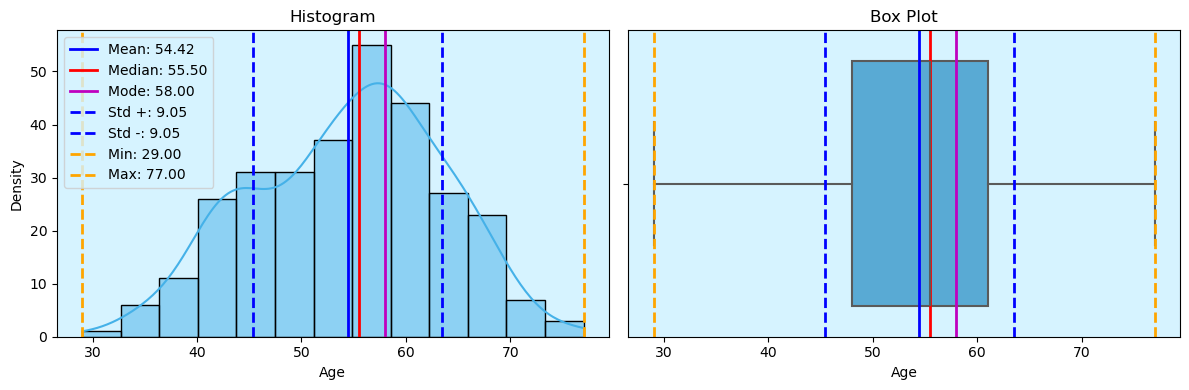

In [186]:
box_hist_plot("Age")

In [187]:
skewness_dist(df_eda, "Age")

Skewness of the Age variable: -0.204
The distribution is left-skewed.


In [188]:
age_outliers, age_lower_bound, age_upper_bound = find_outliers(df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 28.5
Upper Bound: 80.5
Outliers: 0


In [189]:
outliers.update({"Age":len(age_outliers)})

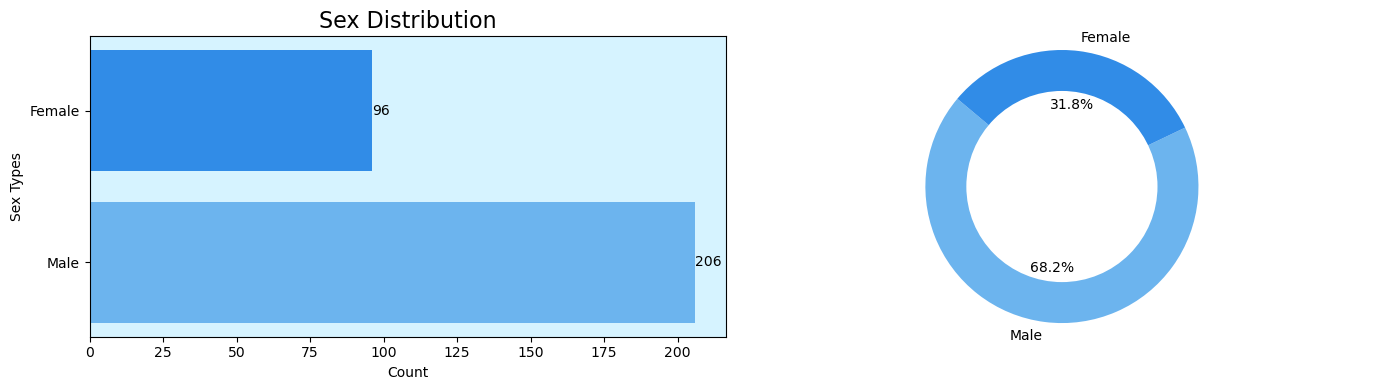

In [190]:
bar_donut_chart("Sex")

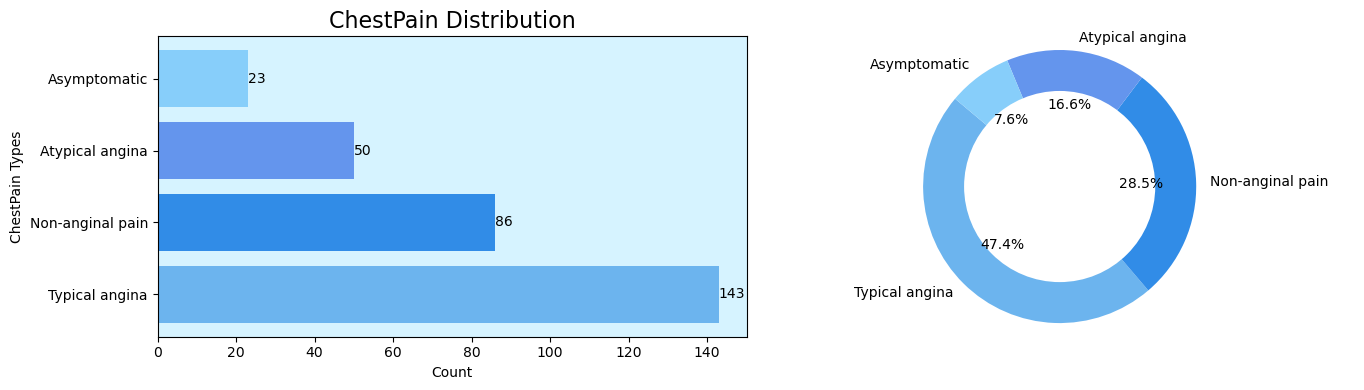

In [191]:
bar_donut_chart("ChestPain")

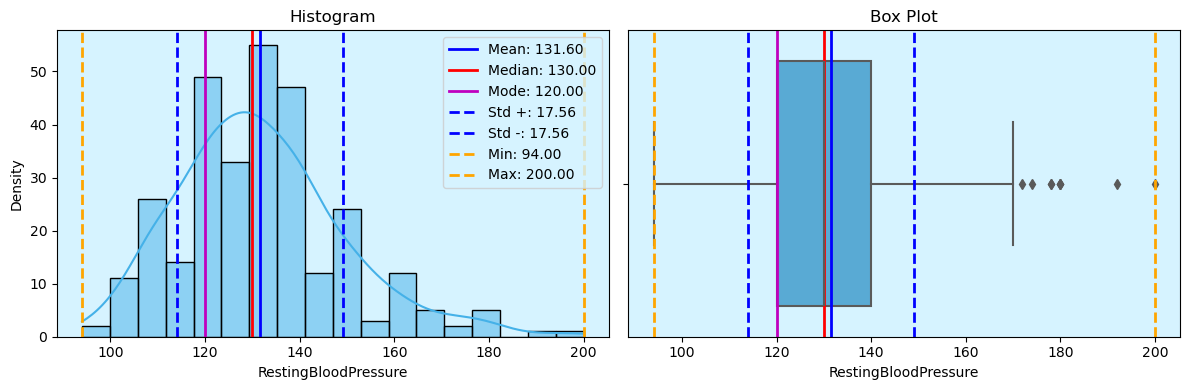

In [192]:
box_hist_plot("RestingBloodPressure")

In [193]:
skewness_dist(df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.717
The distribution is right-skewed.


In [194]:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [195]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})


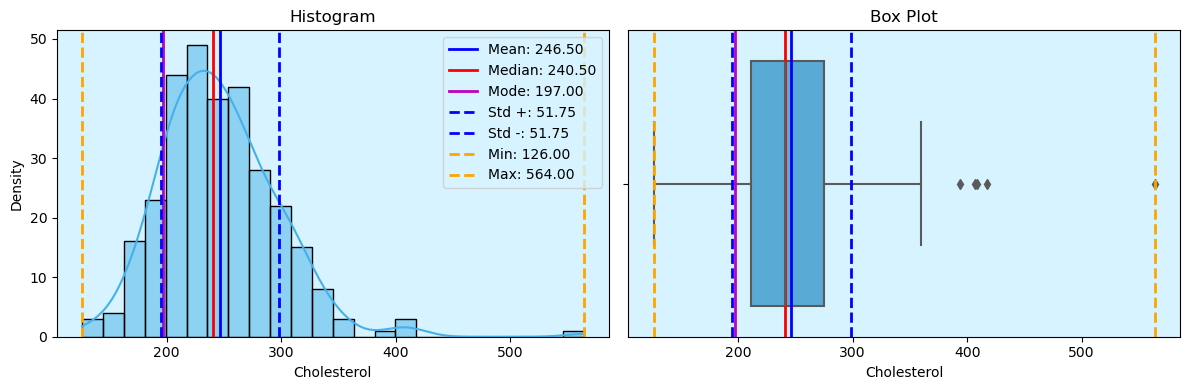

In [196]:
box_hist_plot("Cholesterol")


In [197]:
skewness_dist(df_eda, "Cholesterol")


Skewness of the Cholesterol variable: 1.147
The distribution is right-skewed.


In [198]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.375
Upper Bound: 370.375
Outliers: 5


In [199]:
outliers.update({"Cholesterol":len(ch_outliers)})

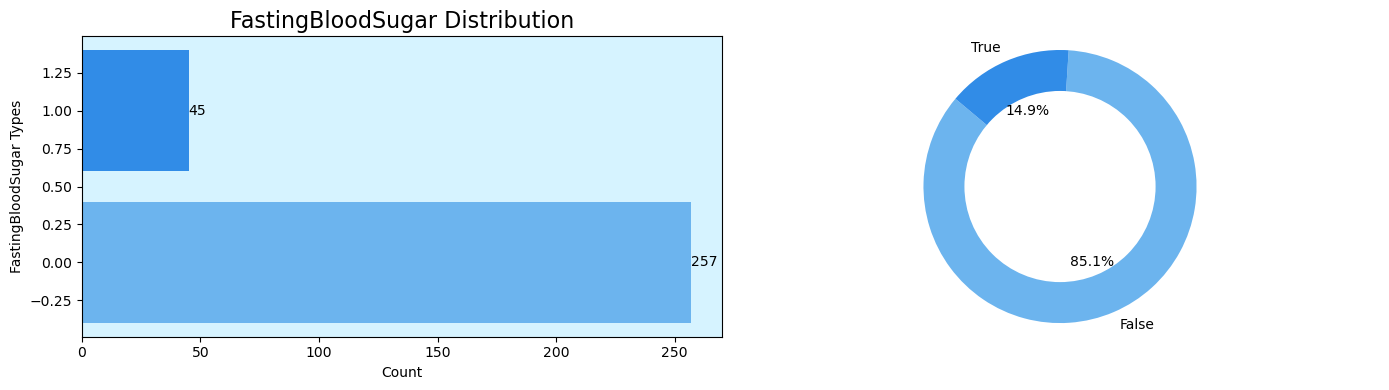

In [200]:
bar_donut_chart("FastingBloodSugar")


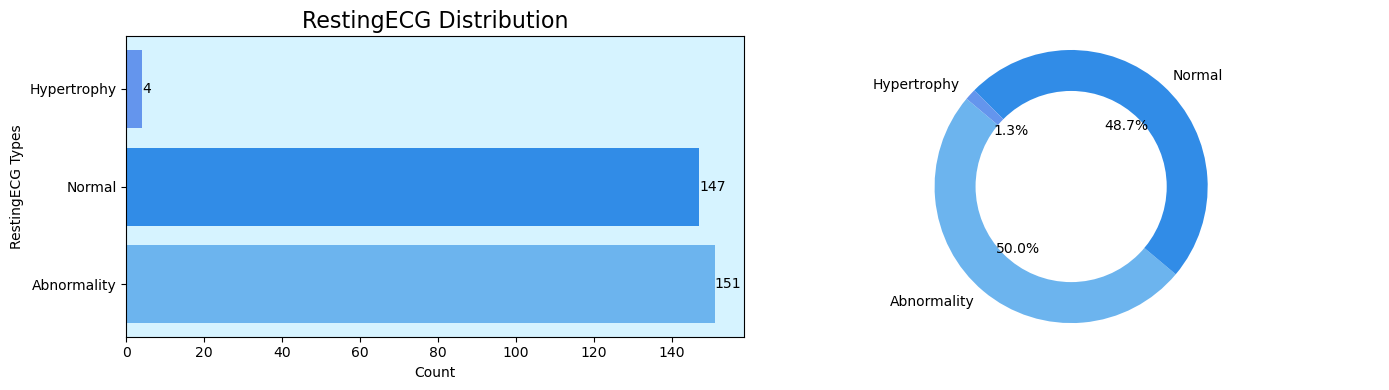

In [201]:
bar_donut_chart("RestingECG")

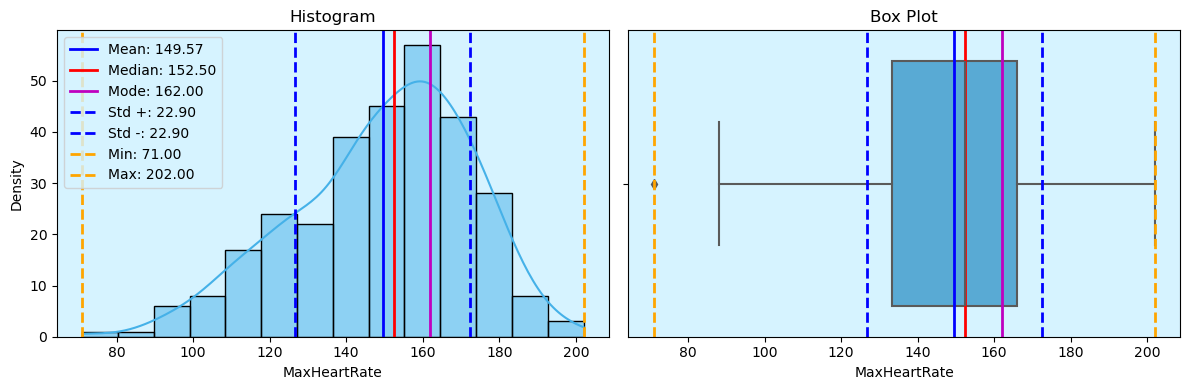

In [202]:
box_hist_plot("MaxHeartRate")


In [203]:
skewness_dist(df_eda, "MaxHeartRate")


Skewness of the MaxHeartRate variable: -0.533
The distribution is left-skewed.


In [204]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 84.125
Upper Bound: 215.125
Outliers': 1


In [205]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})


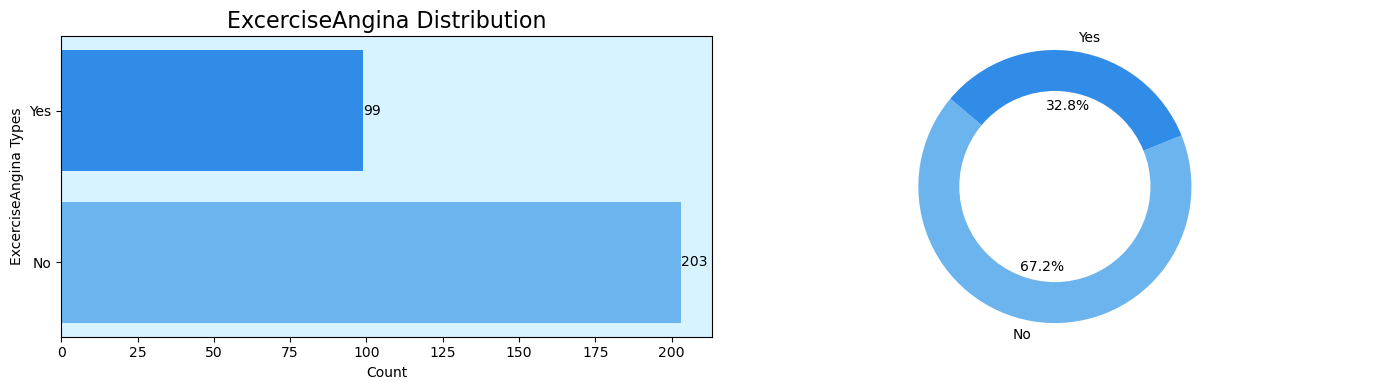

In [206]:
bar_donut_chart("ExcerciseAngina")

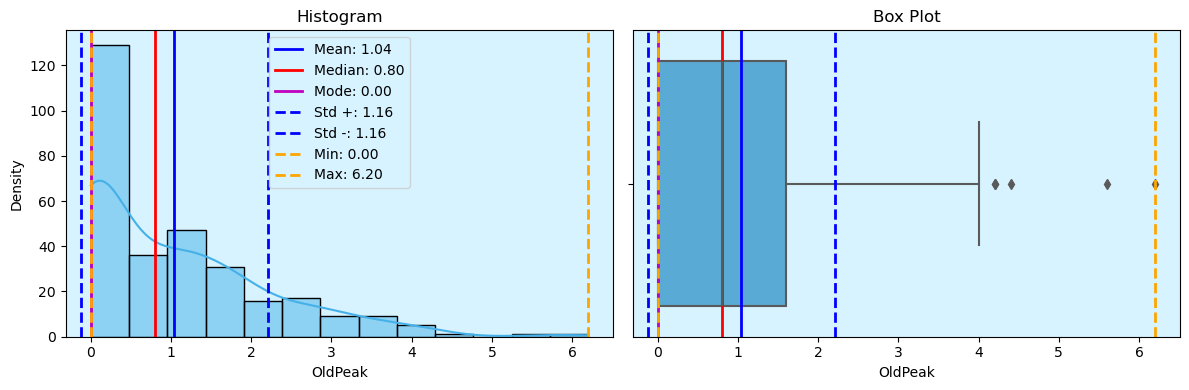

In [207]:
box_hist_plot("OldPeak")

In [208]:
skewness_dist(df_eda, "OldPeak")

Skewness of the OldPeak variable: 1.266
The distribution is right-skewed.


In [209]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers': 5


In [210]:
outliers.update({"OldPeak":len(op_outliers)})

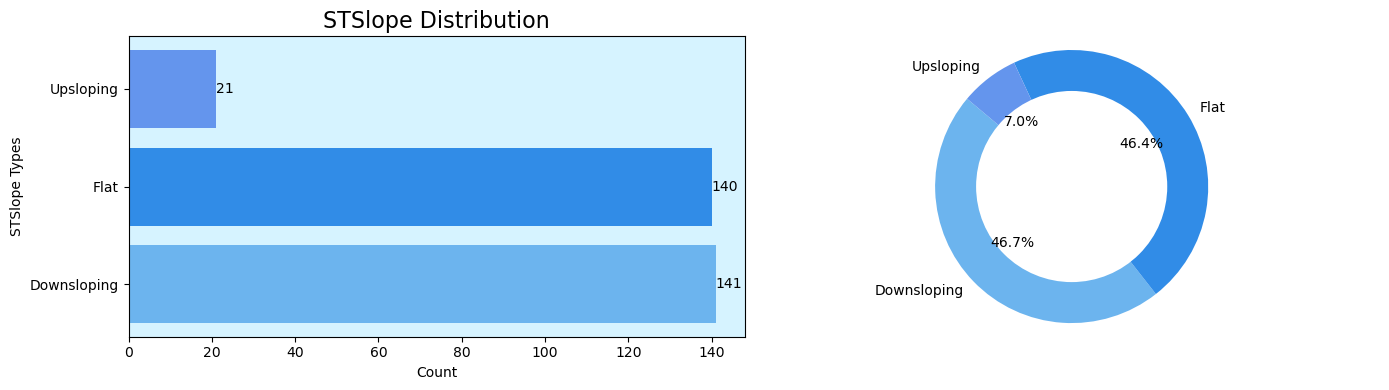

In [211]:
bar_donut_chart("STSlope")


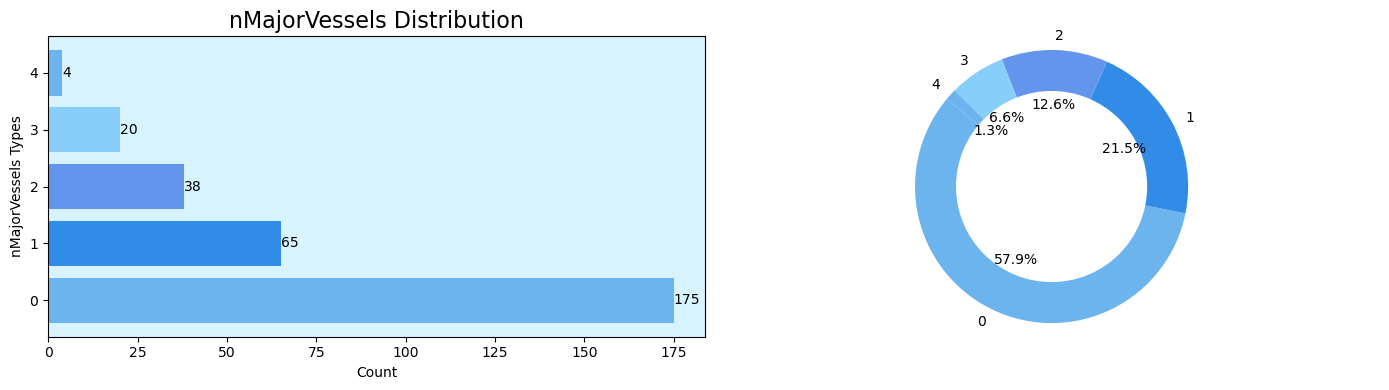

In [212]:
bar_donut_chart("nMajorVessels")

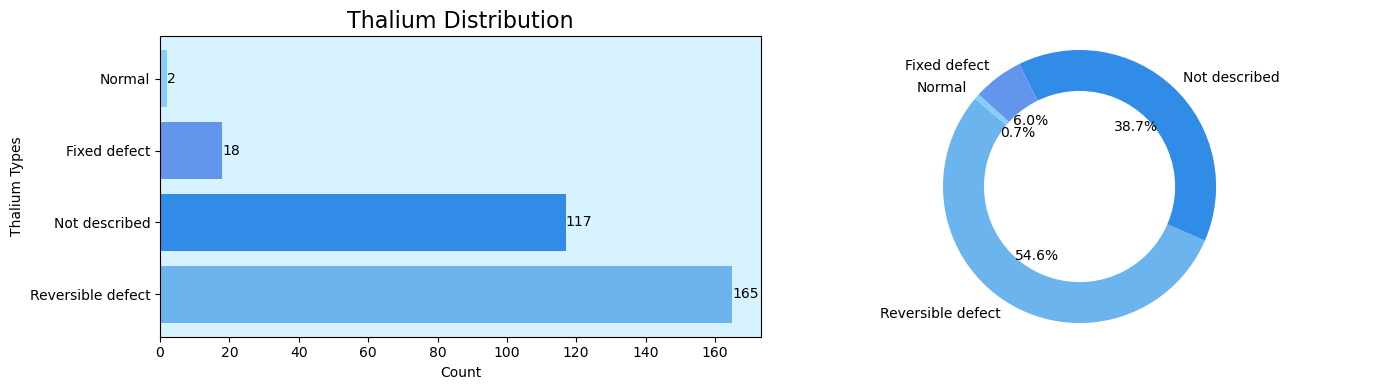

In [213]:
bar_donut_chart("Thalium")

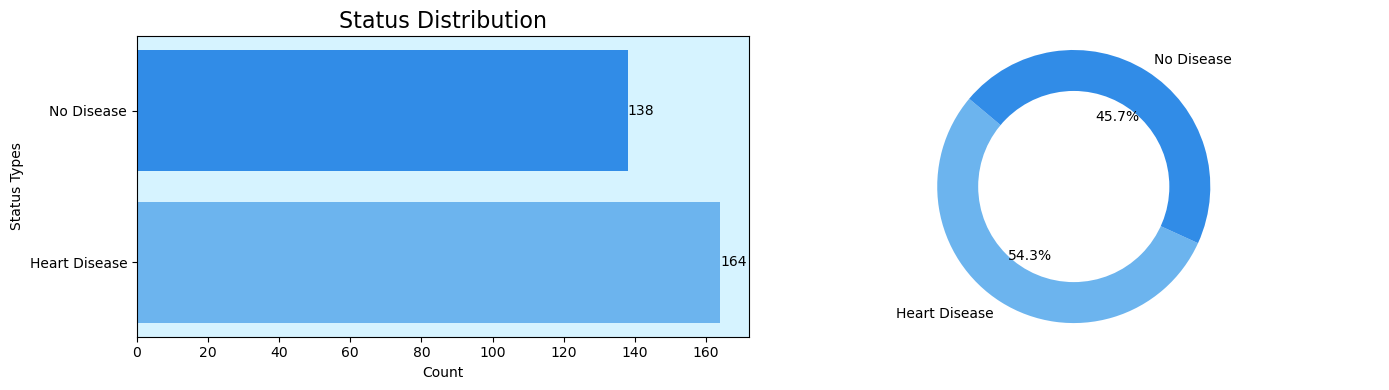

In [214]:
bar_donut_chart("Status")

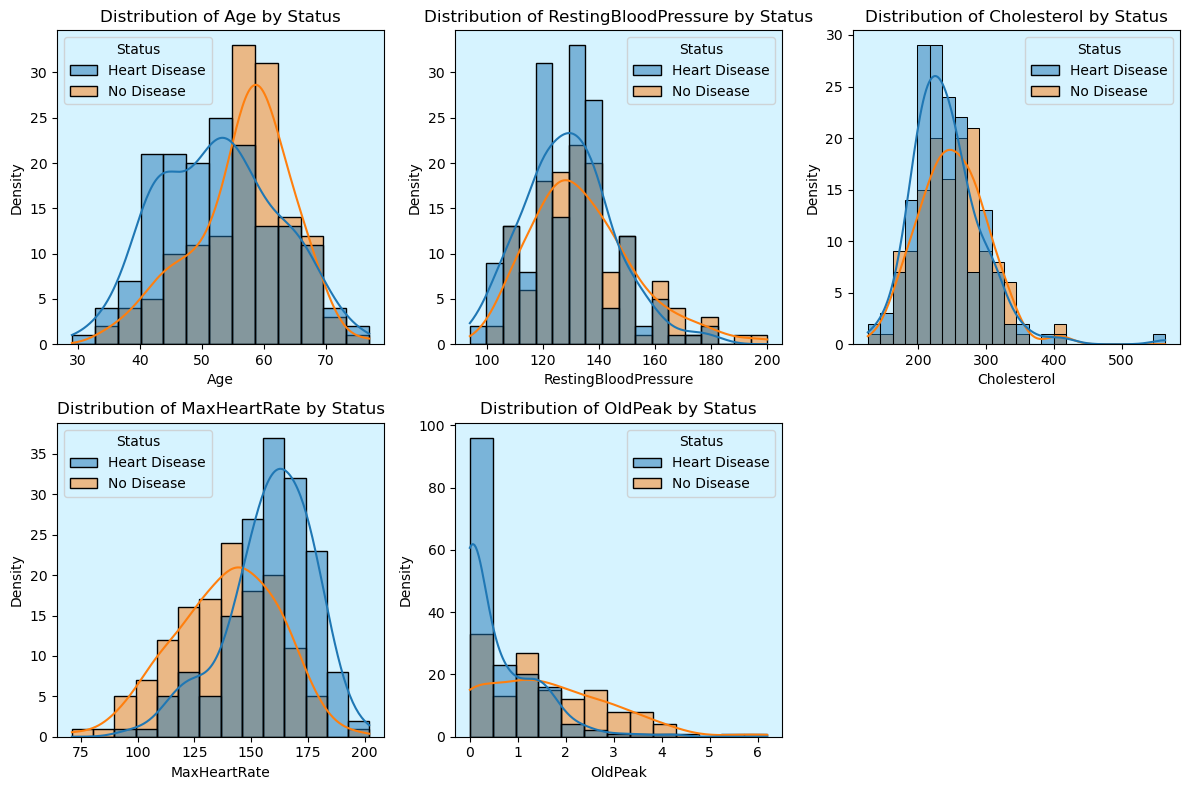

In [215]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

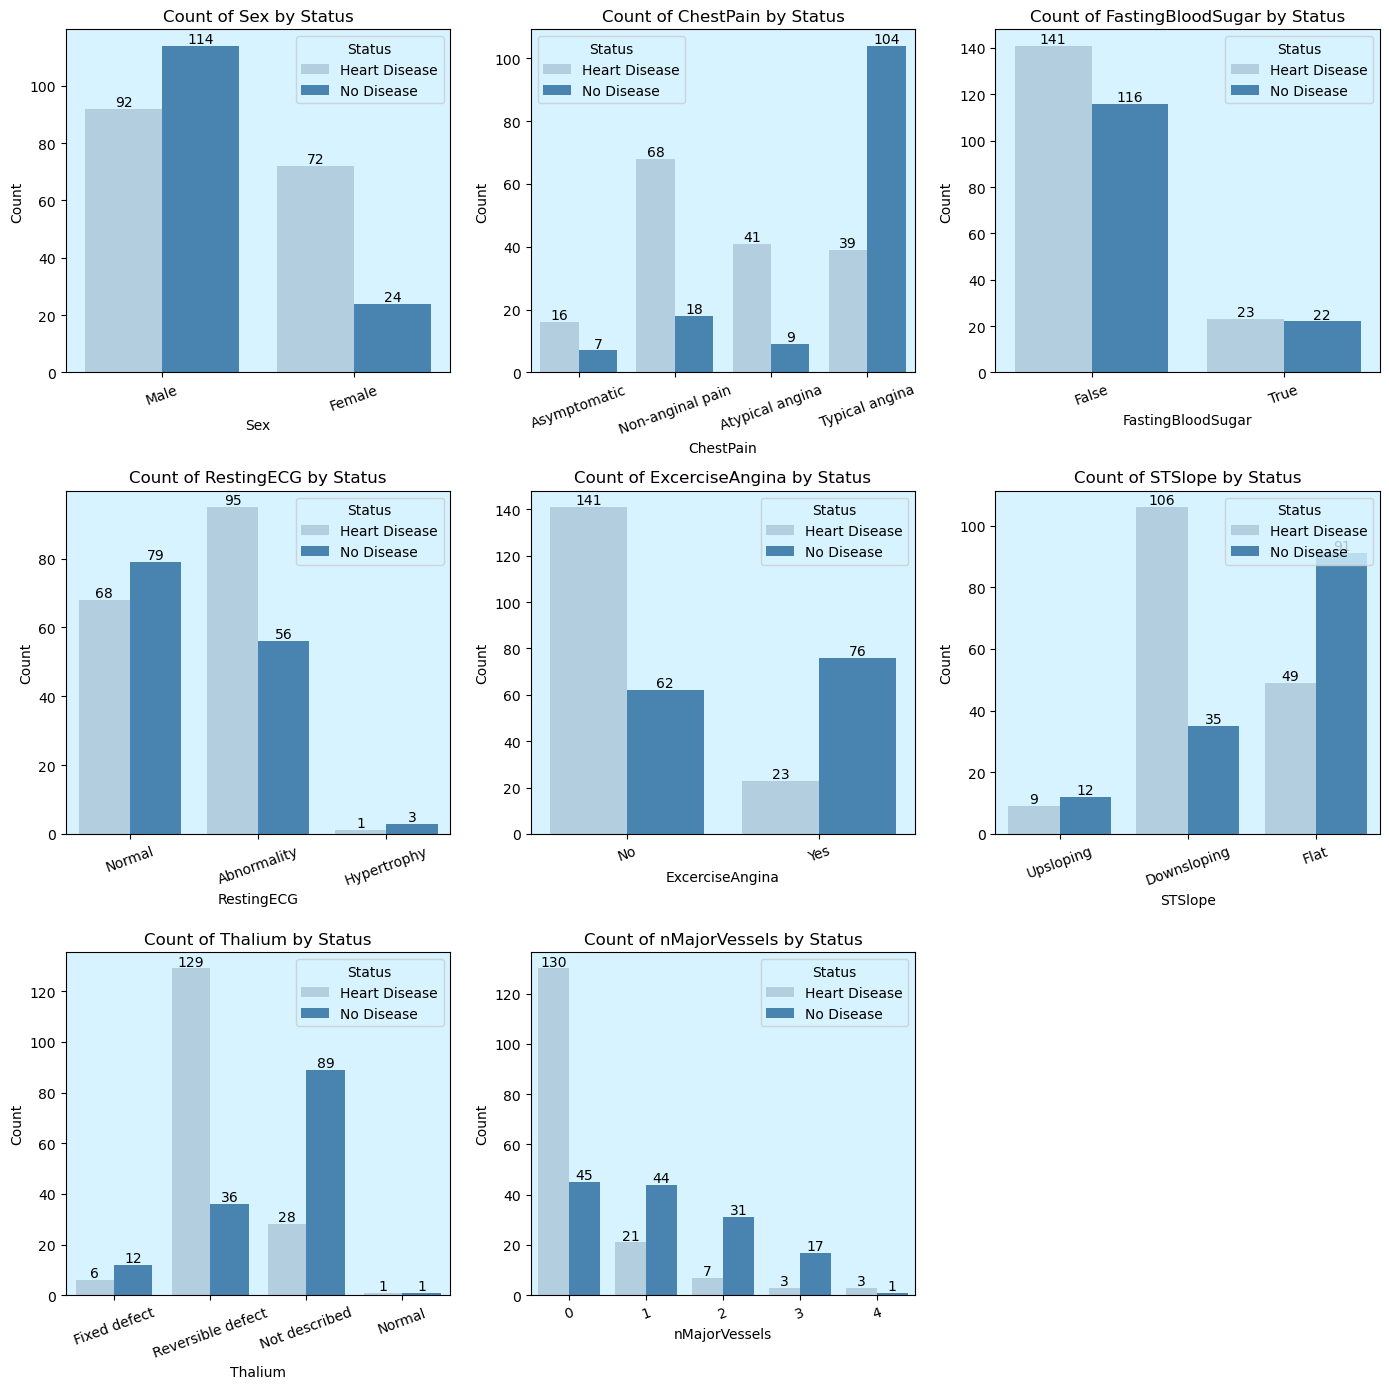

In [216]:
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

In [217]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df

,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


In [218]:
import numpy as np
def box_cox_transform(df):
    """
    It automatically applies the Box-Cox transformation to the specified numerical variables
    in a our dataFrame, finding the optimal lambda value for each variable.
    It enhances data distribution for machine learning by addressing skewness and variance issues.
    """
    
    transformed_df = df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(df[feature] <= 0):
            min_value = abs(df[feature].min()) + 1
            df[feature] += min_value
        transformed_feature, lambda_value = boxcox(df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [219]:
def plot_transform(df, transformed_df, variable):
    """
    function to show the results of transformations on each variable, 
    in a way to see the comparisons before and after applying Box-Cox transformation
    to have a better understanding visually.
    """
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=df[variable], ax=axes[0, 0], color='#00308F') 
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8') 
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(df[variable], ax=axes[1, 0], kde=True, color='#00308F')  
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8') 
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [220]:
transformed_df = box_cox_transform(df)

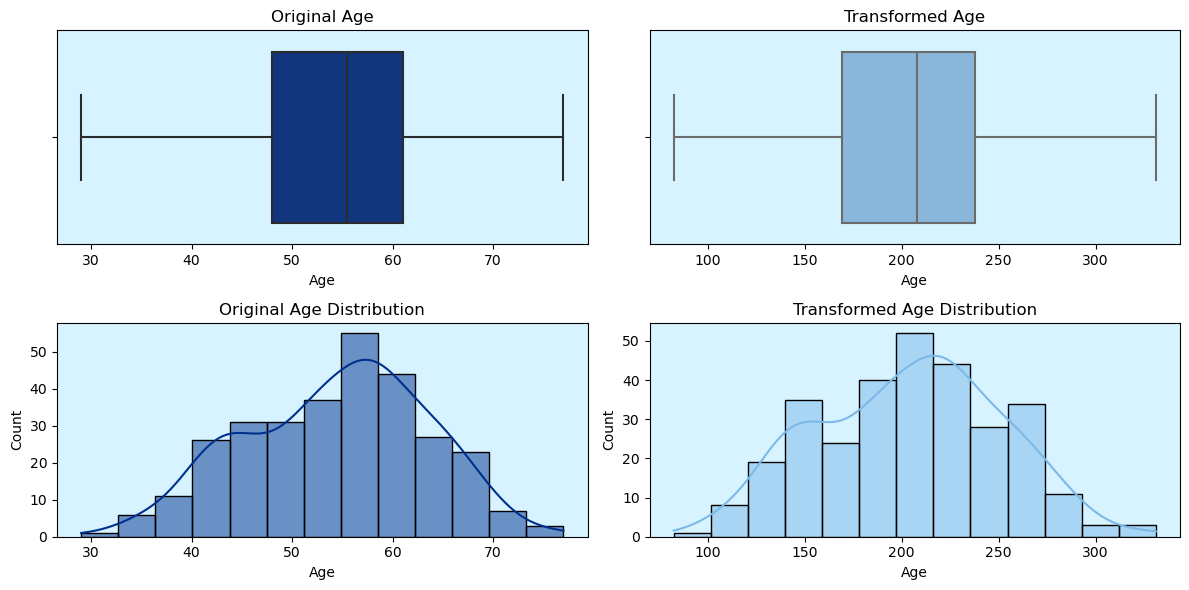

In [221]:
plot_transform(df, transformed_df, 'Age')


In [222]:
skewness_dist(df_eda, "Age")

Skewness of the Age variable: -0.204
The distribution is left-skewed.


In [223]:
skewness_dist(transformed_df, "Age")

Skewness of the Age variable: -0.052
The distribution is left-skewed.


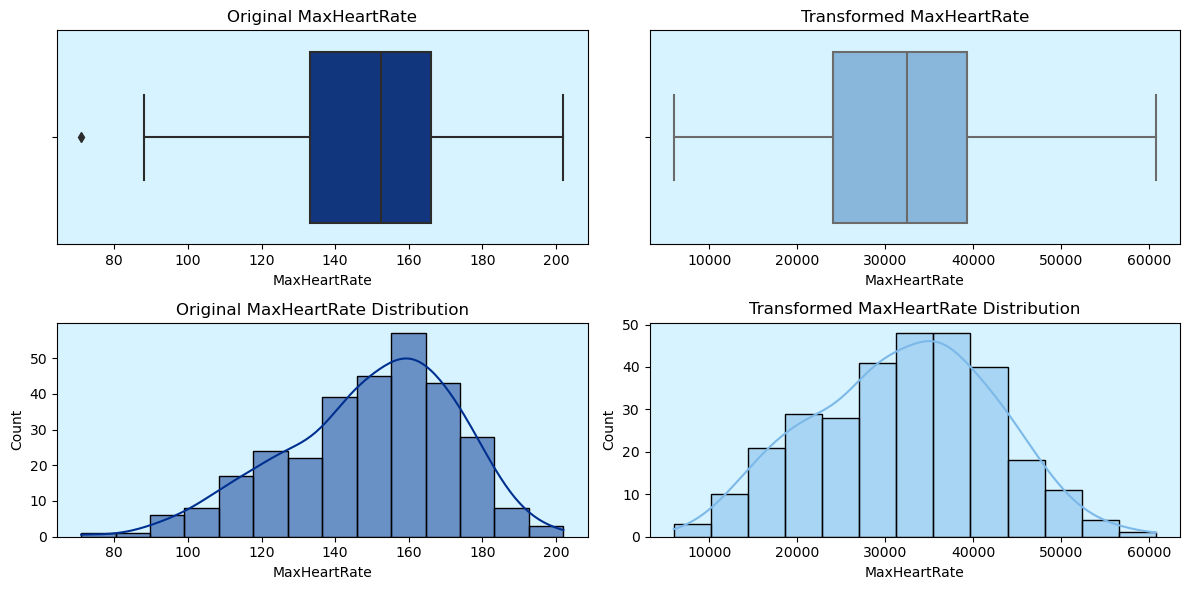

In [224]:
plot_transform(df, transformed_df, 'MaxHeartRate')

In [225]:
skewness_dist(df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.533
The distribution is left-skewed.


In [226]:
skewness_dist(transformed_df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.074
The distribution is left-skewed.


In [227]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]


('MaxHeartRate', 1)

In [228]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 1291.5335944954677
Upper Bound: 62049.13969496357
Outliers': 0


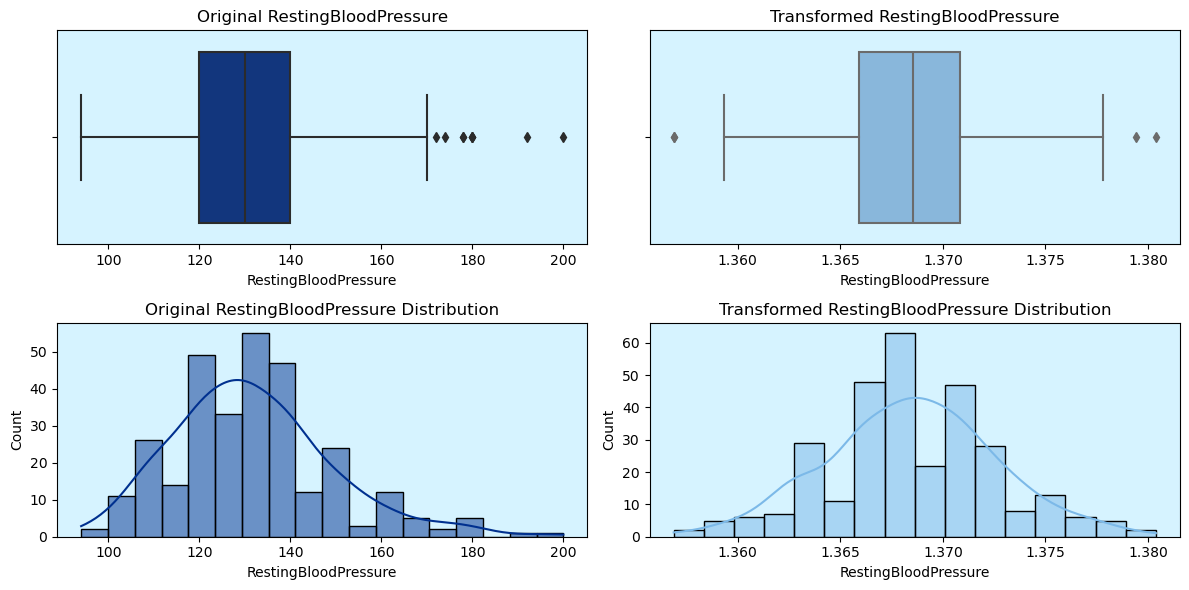

In [229]:
plot_transform(df, transformed_df, 'RestingBloodPressure')


In [230]:
skewness_dist(df_eda, "RestingBloodPressure")


Skewness of the RestingBloodPressure variable: 0.717
The distribution is right-skewed.


In [231]:
skewness_dist(transformed_df, "RestingBloodPressure")


Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


In [232]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]

('RestingBloodPressure', 9)

In [233]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.358474761635975
Upper Bound: 1.378235963425067
Outliers: 4


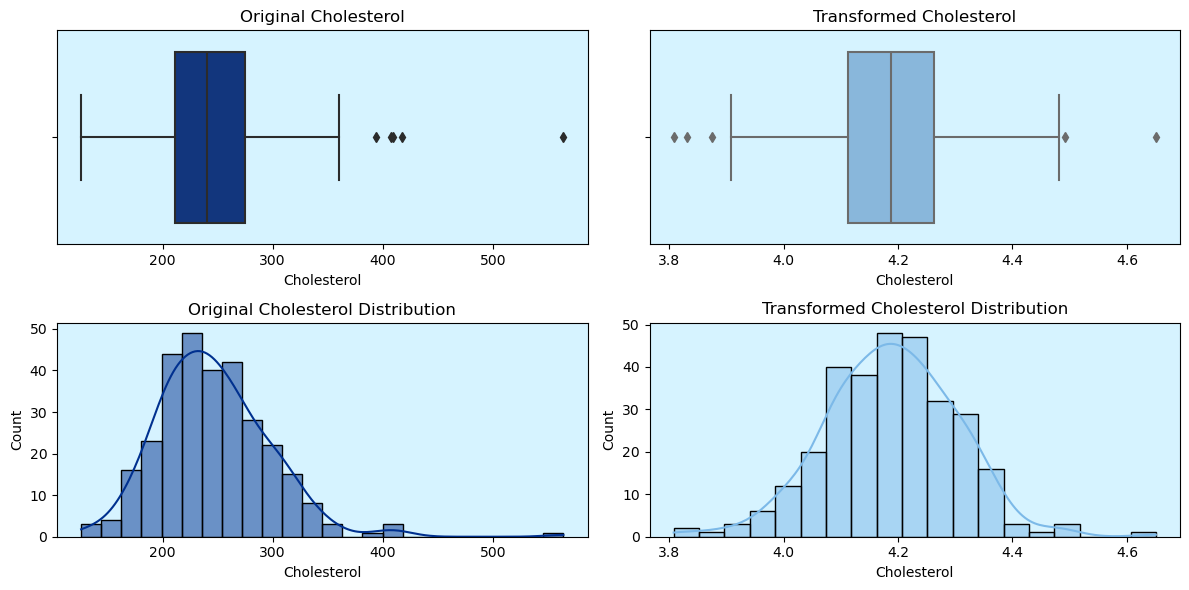

In [234]:
plot_transform(df, transformed_df, 'Cholesterol')


In [235]:
transformed_df = box_cox_transform(df)


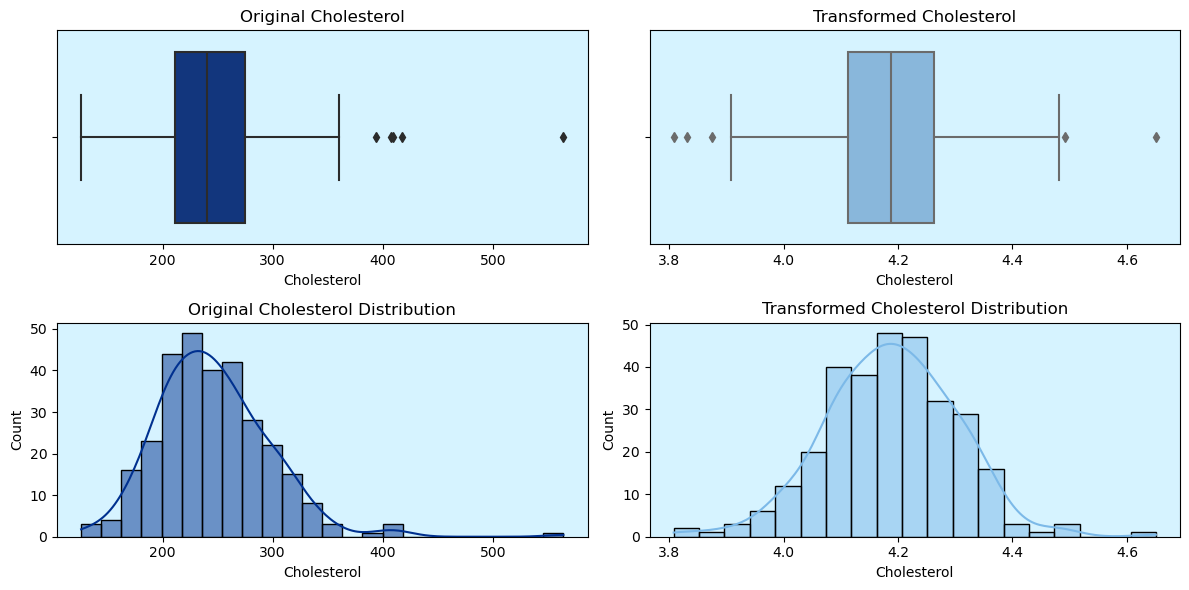

In [236]:
plot_transform(df, transformed_df, 'Cholesterol')


In [237]:
skewness_dist(df_eda, "Cholesterol")


Skewness of the Cholesterol variable: 1.147
The distribution is right-skewed.


In [238]:
skewness_dist(transformed_df, "Cholesterol")


Skewness of the Cholesterol variable: -0.006
The distribution is left-skewed.


In [239]:
outliers_df["Variable"][2], outliers_df["Outliers"][2]


('Cholesterol', 5)

In [240]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.887541467672795
Upper Bound: 4.487259350673975
Outliers: 5


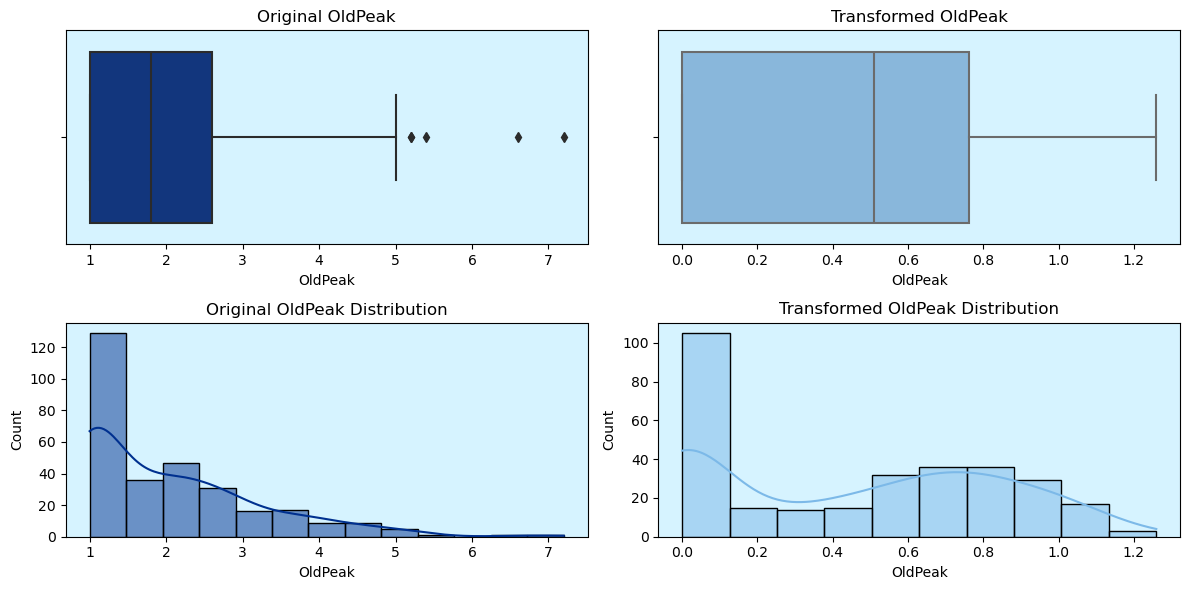

In [241]:
plot_transform(df, transformed_df, 'OldPeak')

In [242]:
skewness_dist(df_eda, "OldPeak")

Skewness of the OldPeak variable: 1.266
The distribution is right-skewed.


In [243]:
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 0.122
The distribution is right-skewed.


In [244]:
outliers_df["Variable"][4], outliers_df["Outliers"][4]

('OldPeak', 5)

In [245]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.1419610503811508
Upper Bound: 1.903268417301918
Outliers': 0


In [246]:
transformed = transformed_df.copy()


In [247]:
df_copy = df.copy()

In [248]:
df.isnull().sum()


Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [249]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,2.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,1.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,1.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,1.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,2.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,7.200000,4.000000


In [250]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status


## One-Hot Encoding

In [251]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]


In [252]:
df = pd.get_dummies(df, columns=features_to_encode)


In [253]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)


In [254]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

In [255]:
bool_columns2 = df.select_dtypes(include=bool).columns
df[bool_columns2] = df[bool_columns2].astype("int64")

## Label Encoding

In [256]:
label_encoder = LabelEncoder()

In [257]:
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']


In [258]:
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [259]:
for feature in features_to_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

In [260]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         302 non-null    float64
 1   Sex                         302 non-null    int32  
 2   RestingBloodPressure        302 non-null    float64
 3   Cholesterol                 302 non-null    float64
 4   FastingBloodSugar           302 non-null    int32  
 5   MaxHeartRate                302 non-null    float64
 6   ExcerciseAngina             302 non-null    int32  
 7   OldPeak                     302 non-null    float64
 8   nMajorVessels               302 non-null    int64  
 9   Status                      302 non-null    int32  
 10  ChestPain_Asymptomatic      302 non-null    int64  
 11  ChestPain_Atypical angina   302 non-null    int64  
 12  ChestPain_Non-anginal pain  302 non-null    int64  
 13  ChestPain_Typical angina    302 non-null

In [261]:
df_corr = df.copy()


In [262]:
df2 = df.copy()

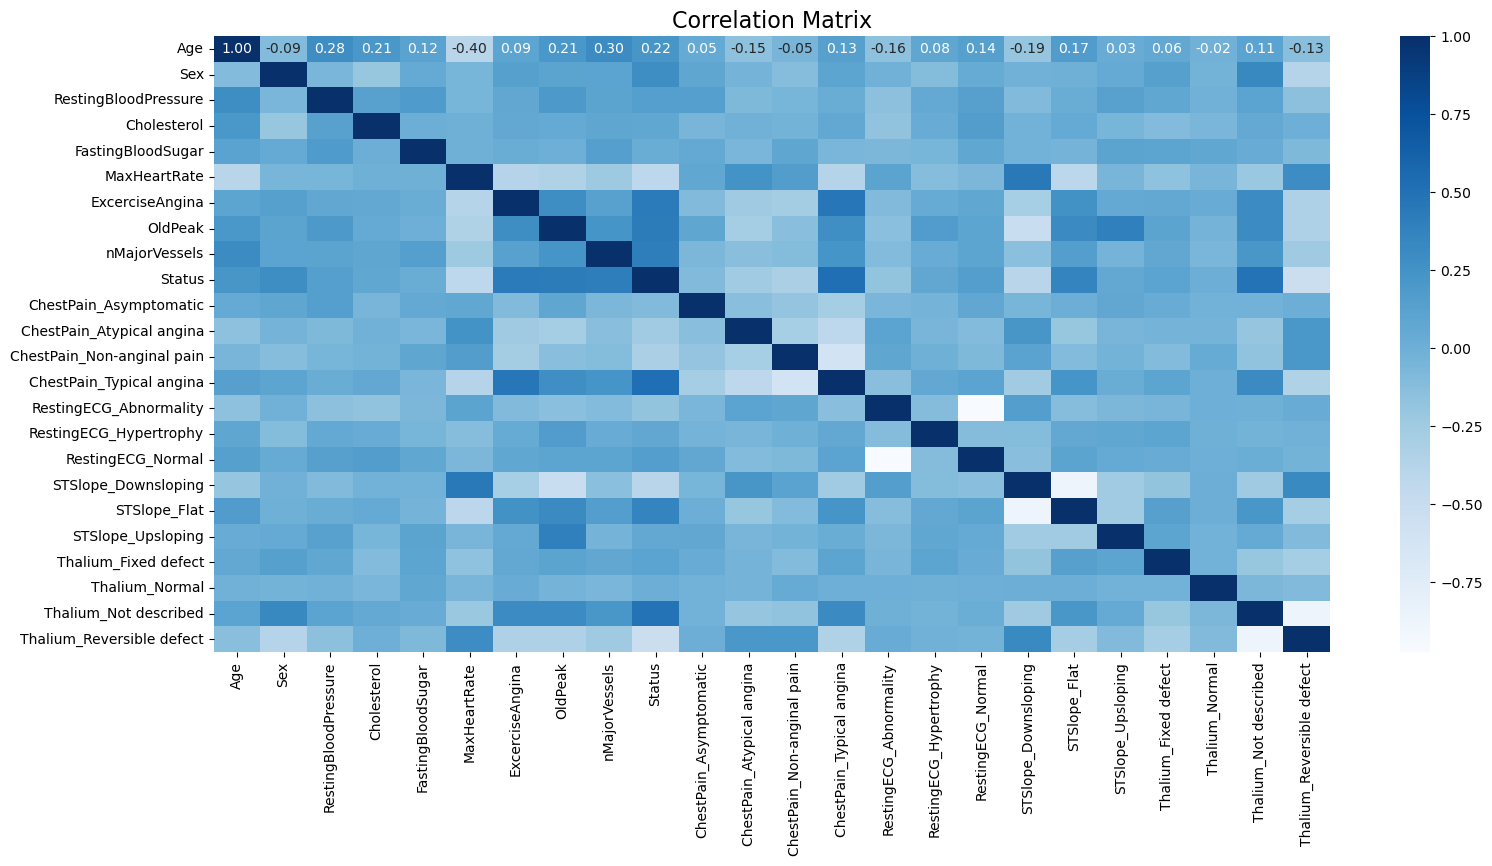

In [263]:
df_correlation = df_corr.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [264]:
df2.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [265]:
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [266]:
df3_no_transformed = df2.copy()

In [267]:
df3 = transformed.copy()

In [268]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])

transformed_scaled = scaler.transform(transformed[features_to_scale])
transformed[features_to_scale] = transformed_scaled


In [269]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])

In [270]:
df2[features_to_scale] = scaler.fit_transform(df[features_to_scale])

## tain test split

In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split

def customize_split(df, test_size=0.2, random_state=42):
    # Ensure reproducibility
    df = df.sample(frac=1, random_state=random_state)
    
    # Split the data into train and test sets with stratification
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Status'])
    
    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values
    
    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values
    
    print("Train set class distribution:")
    print(train_df['Status'].value_counts())
    print("\nTest set class distribution:")
    print(test_df['Status'].value_counts())
    
    percent_train = (len(train_df) / len(df)) * 100
    percent_test = (len(test_df) / len(df)) * 100
    
    return X_train, X_test, y_train, y_test, percent_train, percent_test


In [272]:

df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_transformed, ptest_transformed = customize_split(transformed)

Train set class distribution:
Status
0    131
1    110
Name: count, dtype: int64

Test set class distribution:
Status
0    33
1    28
Name: count, dtype: int64
Train set class distribution:
Status
0    131
1    110
Name: count, dtype: int64

Test set class distribution:
Status
0    33
1    28
Name: count, dtype: int64


In [273]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 79.80%
Percentage of samples for testing: 20.20%


In [274]:
print(len(df2_X_train), len(df2_X_test), len(df2_y_train), len(df2_y_test))

241 61 241 61


In [275]:
(pd.DataFrame(df2_y_train)).value_counts()

0    131
1    110
Name: count, dtype: int64

In [276]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(df3)

Train set class distribution:
Status
0    131
1    110
Name: count, dtype: int64

Test set class distribution:
Status
0    33
1    28
Name: count, dtype: int64


In [277]:
df3_tr_X_train, df3_tr_X_test, df3_tr_y_train, df3_tr_y_test, ptrain_df3_tr, ptest_df3_tr = customize_split(df3_no_transformed)

Train set class distribution:
Status
0    131
1    110
Name: count, dtype: int64

Test set class distribution:
Status
0    33
1    28
Name: count, dtype: int64


## ZeroR Classifier without hyp

Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



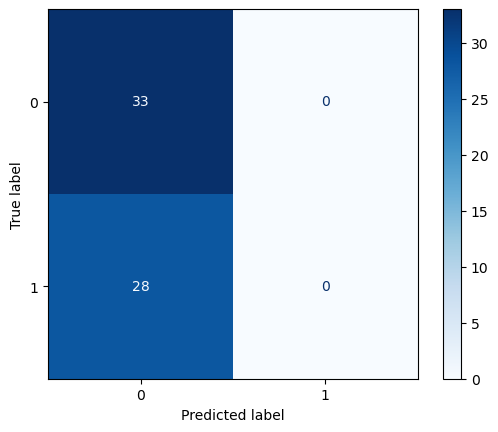

Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



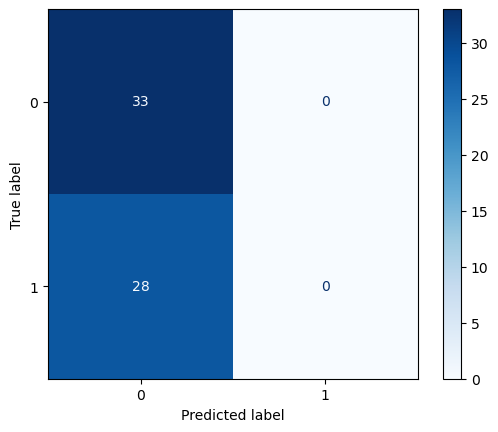

In [278]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_evaluate_zeroR(X_train, X_test, y_train, y_test):
    # Initialize the ZeroR model
    zeroR = DummyClassifier()
    
    # Fit the model on the training data
    zeroR.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = zeroR.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Example usage:
# After training and evaluating your model, you can call this function

# Train and evaluate ZeroR for df2
df2_y_pred = train_evaluate_zeroR(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Train and evaluate ZeroR for transformed
transformed_y_pred = train_evaluate_zeroR(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred)



## KNN without hyper param tuning

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



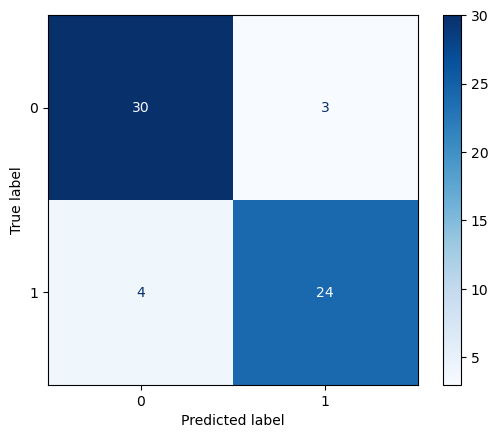

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.79      0.83        28

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



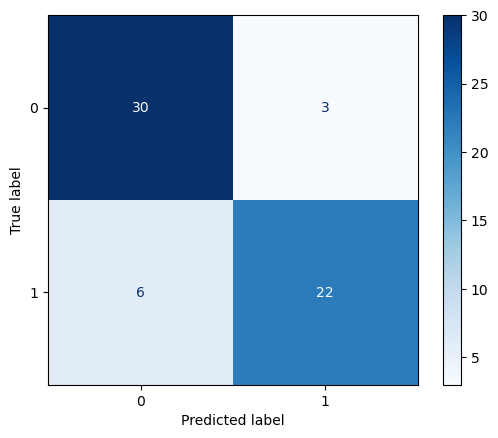

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def train_evaluate_knn(X_train, X_test, y_train, y_test):
    # Initialize the KNN model with default parameters
    knn = KNeighborsClassifier()
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Example usage:
# After training and evaluating your model, you can call this function

# Train and evaluate KNN for df2
df2_y_pred = train_evaluate_knn(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Train and evaluate KNN for transformed
transformed_y_pred = train_evaluate_knn(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


## KNN Model with hyper param tuning

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
def train_evaluate_knn_with_random_search(X_train, X_test, y_train, y_test):
    # Define the KNN model
    knn = KNeighborsClassifier()
    
    # Define the parameter grid
    param_dist = {
        'n_neighbors': np.arange(1, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        knn,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    
    # Evaluate the best model
    best_knn = random_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    
    # Compute accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return best_knn, y_pred, best_params

# Train and evaluate KNN with RandomizedSearchCV for df2
best_knn_df2, df2_y_pred, best_params_df2 = train_evaluate_knn_with_random_search(df2_X_train, df2_X_test, df2_y_train, df2_y_test)

# Train and evaluate KNN with RandomizedSearchCV for transformed
best_knn_transformed, transformed_y_pred, best_params_transformed = train_evaluate_knn_with_random_search(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'uniform', 'n_neighbors': 18, 'metric': 'manhattan'}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.91      0.75      0.82        28

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'uniform', 'n_neighbors': 16, 'metric': 'manhattan'}
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.88      0.75      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84  

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'uniform', 'n_neighbors': 18, 'metric': 'manhattan'}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.91      0.75      0.82        28

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



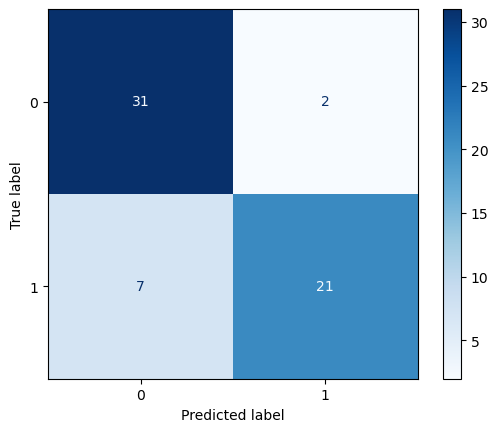

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'uniform', 'n_neighbors': 16, 'metric': 'manhattan'}
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.88      0.75      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



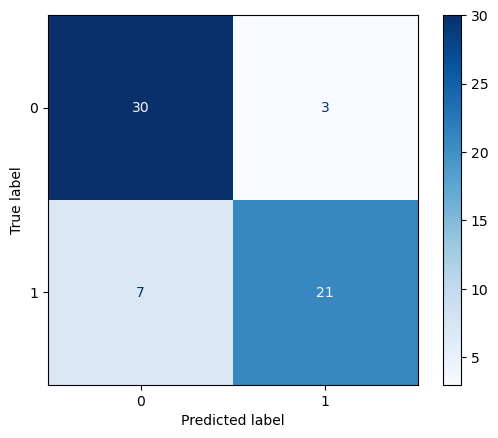

In [281]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Example usage:
# After training and evaluating your model, you can call this function

# Train and evaluate KNN with RandomizedSearchCV for df2
best_knn_df2, df2_y_pred, best_params_df2 = train_evaluate_knn_with_random_search(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Train and evaluate KNN with RandomizedSearchCV for transformed
best_knn_transformed, transformed_y_pred, best_params_transformed = train_evaluate_knn_with_random_search(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


In [282]:
plot_knn_evaluation(train_accuracies_p1, test_accuracies_p1, k_p1, "Original Data", p=1)

NameError: name 'plot_knn_evaluation' is not defined

In [ ]:
plot_knn_evaluation(train_accuracies_p2, test_accuracies_p2, k_p2,"Original Data", p=2)

In [ ]:
plot_knn_evaluation(train_accuracies_p1_transform, test_accuracies_p1_transform, k_p1_transform, "Transformed Data", p=1)

In [ ]:
plot_knn_evaluation(train_accuracies_p2_transform, test_accuracies_p2_transform, k_p2_transform, "Transformed Data", p=2)

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split

def customize_split(df):
    # Shuffle the dataframe
    df_shuffled = df.sample(frac=1, random_state=42)

    # Split the data into train and test sets using stratification
    train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=42, stratify=df_shuffled['Status'])

    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values 

    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    print(test_df['Status'].value_counts())

    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100
    
    return X_train, X_test, y_train, y_test, percent_train, percent_test



In [284]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status
0    33
1    28
Name: count, dtype: int64
Status
0    33
1    28
Name: count, dtype: int64


In [285]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 79.80%
Percentage of samples for testing: 20.20%


In [286]:
print(len(df2_X_train), len(df2_X_test), len(df2_y_train), len(df2_y_test))

241 61 241 61


In [287]:
(pd.DataFrame(df2_y_train)).value_counts()

0    131
1    110
Name: count, dtype: int64

In [288]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(df3)

Status
0    33
1    28
Name: count, dtype: int64


In [289]:
df3_tr_X_train, df3_tr_X_test, df3_tr_y_train, df3_tr_y_test, ptrain_df3_tr, ptest_df3_tr = customize_split(df3_no_transformed)

Status
0    33
1    28
Name: count, dtype: int64


## SVM Model without hyp pararm

In [290]:
def train_evaluate_svm(X_train, X_test, y_train, y_test):
    # Initialize the SVM model with default parameters
    svm = SVC()
    
    # Fit the model on the training data
    svm.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = svm.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# Train and evaluate SVM for df2
df2_y_pred = train_evaluate_svm(df2_X_train, df2_X_test, df2_y_train, df2_y_test)

# Train and evaluate SVM for transformed
transformed_y_pred = train_evaluate_svm(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.92      0.86      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.82      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



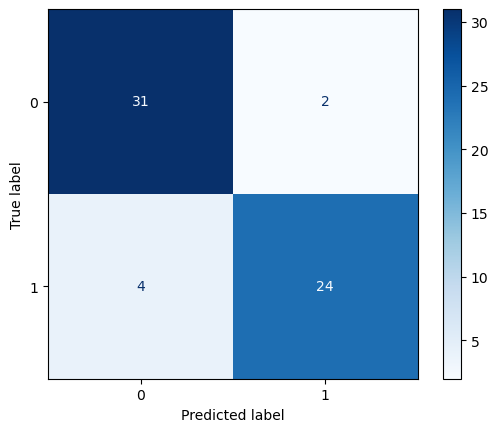

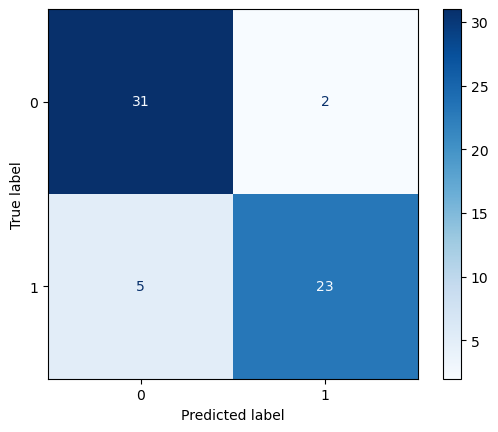

In [291]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


## SVM Model with hyp pararm

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 1.0}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.79      0.83        28

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



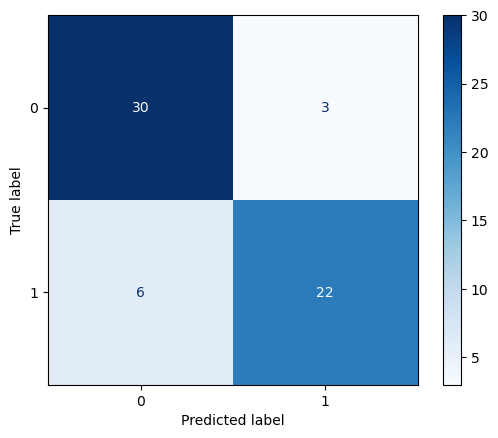

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 0.01}
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.87      0.71      0.78        28

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



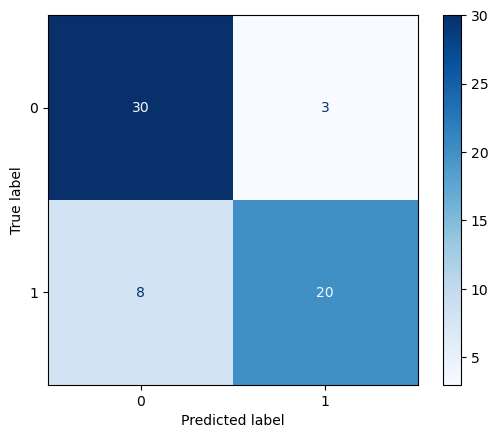

In [292]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def train_evaluate_svm_with_random_search(X_train, X_test, y_train, y_test):
    # Define the SVM model
    svm = SVC()
    
    # Define the parameter grid
    param_dist = {
        'C': np.logspace(-3, 2, 6),
        'gamma': np.logspace(-4, 1, 6),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        svm,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    
    # Evaluate the best model
    best_svm = random_search.best_estimator_
    y_pred = best_svm.predict(X_test)
    
    # Compute accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return best_svm, y_pred, best_params

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Train and evaluate SVM with RandomizedSearchCV for df2
best_svm_df2, df2_y_pred, best_params_df2 = train_evaluate_svm_with_random_search(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Train and evaluate SVM with RandomizedSearchCV for transformed
best_svm_transformed, transformed_y_pred, best_params_transformed = train_evaluate_svm_with_random_search(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


## Random forest without hyp pararm

In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_evaluate_rf(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest model with default parameters
    rf = RandomForestClassifier()
    
    # Fit the model on the training data
    rf.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = rf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# For df2
df2_y_pred = train_evaluate_rf(df2_X_train, df2_X_test, df2_y_train, df2_y_test)

# For transformed
transformed_y_pred = train_evaluate_rf(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.79      0.83        28

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



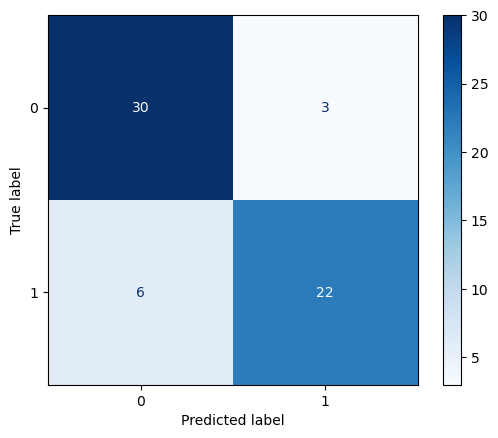

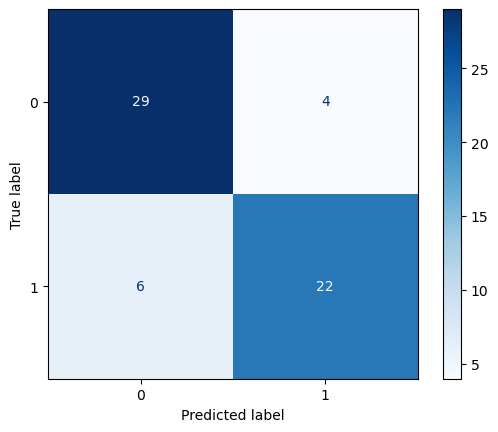

In [294]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


## Random forest with grid search hyp pararm

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.81      0.75      0.78        28

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



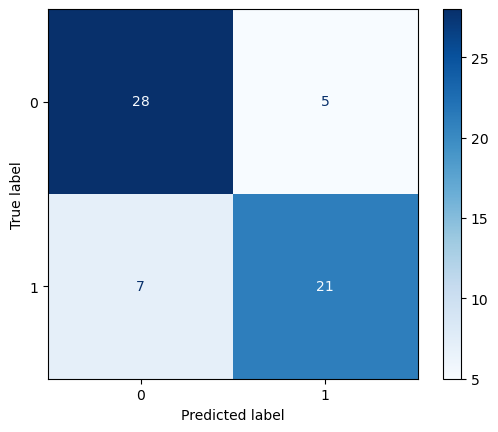

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False}
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.84      0.75      0.79        28

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



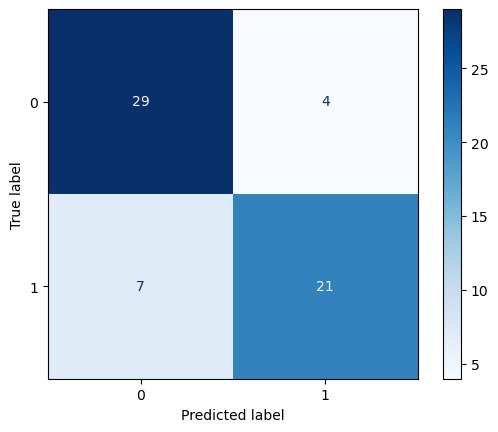

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def train_evaluate_rf_with_random_search(X_train, X_test, y_train, y_test):
    # Define the Random Forest model
    rf = RandomForestClassifier()
    
    # Define the parameter grid
    param_dist = {
        'n_estimators': [50, 100, 200, 400, 600, 800, 1000],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        rf,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    
    # Evaluate the best model
    best_rf = random_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    
    # Compute accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return best_rf, y_pred, best_params

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Train and evaluate Random Forest with RandomizedSearchCV for df2
best_rf_df2, df2_y_pred, best_params_df2 = train_evaluate_rf_with_random_search(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Train and evaluate Random Forest with RandomizedSearchCV for transformed
best_rf_transformed, transformed_y_pred, best_params_transformed = train_evaluate_rf_with_random_search(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


## Decision tree without hype

In [296]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_evaluate_dt(X_train, X_test, y_train, y_test, random_state=42):
    # Initialize the Decision Tree model with default parameters
    dt = DecisionTreeClassifier(random_state=random_state)
    
    # Fit the model on the training data
    dt.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = dt.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred, dt

# Set random seed for reproducibility
random_state = 42

# For df2
df2_y_pred_dt, best_dt_df2 = train_evaluate_dt(df2_X_train, df2_X_test, df2_y_train, df2_y_test, random_state=random_state)

# For transformed
transformed_y_pred_dt, best_dt_transformed = train_evaluate_dt(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, random_state=random_state)


Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.61      0.68      0.64        28

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.61      0.68      0.64        28

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



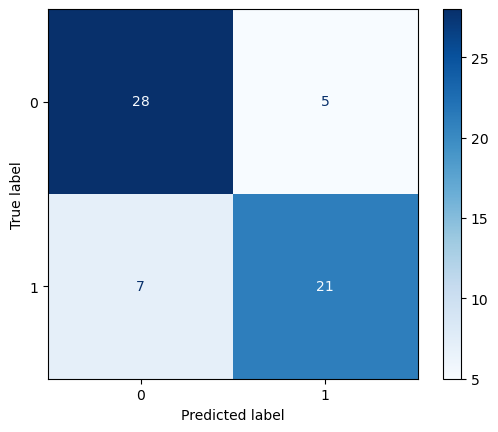

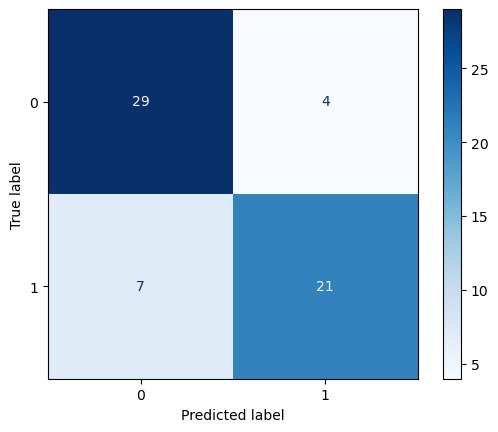

In [297]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred)


In [298]:
## Decision tree without hype

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        33
           1       0.82      0.64      0.72        28

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



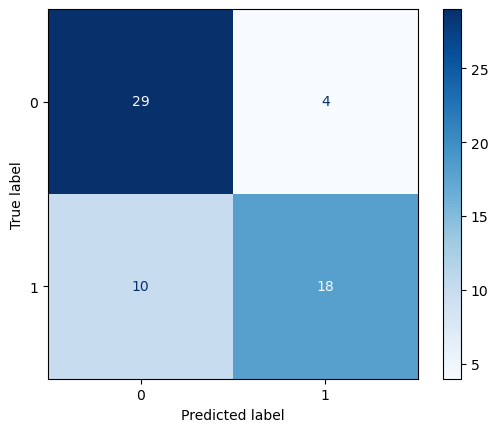

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'criterion': 'entropy'}
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.76      0.68      0.72        28

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



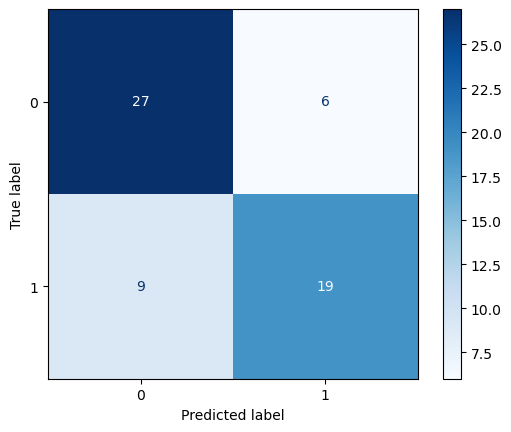

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def train_evaluate_dt_with_random_search(X_train, X_test, y_train, y_test):
    # Define the Decision Tree model
    dt = DecisionTreeClassifier()
    
    # Define the parameter grid
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2', None]
    }
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        dt,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Print the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)
    
    # Evaluate the best model
    best_dt = random_search.best_estimator_
    y_pred = best_dt.predict(X_test)
    
    # Compute accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return best_dt, y_pred, best_params

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Train and evaluate Decision Tree with RandomizedSearchCV for df2
best_dt_df2, df2_y_pred_dt, best_params_df2_dt = train_evaluate_dt_with_random_search(df2_X_train, df2_X_test, df2_y_train, df2_y_test)
plot_confusion_matrix(df2_y_test, df2_y_pred_dt)

# Train and evaluate Decision Tree with RandomizedSearchCV for transformed
best_dt_transformed, transformed_y_pred_dt, best_params_transformed_dt = train_evaluate_dt_with_random_search(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)
plot_confusion_matrix(transformed_y_test, transformed_y_pred_dt)


## Logistic Regression without hype

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def train_evaluate_lr(X_train, X_test, y_train, y_test):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize the Logistic Regression model with default parameters
    lr = LogisticRegression()
    
    # Fit the model on the training data
    lr.fit(X_train_scaled, y_train)
    
    # Predict the labels for the test data
    y_pred = lr.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# For df2
df2_y_pred_lr = train_evaluate_lr(df2_X_train, df2_X_test, df2_y_train, df2_y_test)

# For transformed
transformed_y_pred_lr = train_evaluate_lr(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.88      0.75      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.91      0.75      0.82        28

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



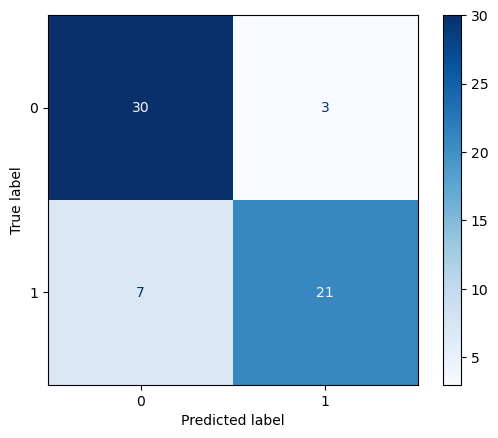

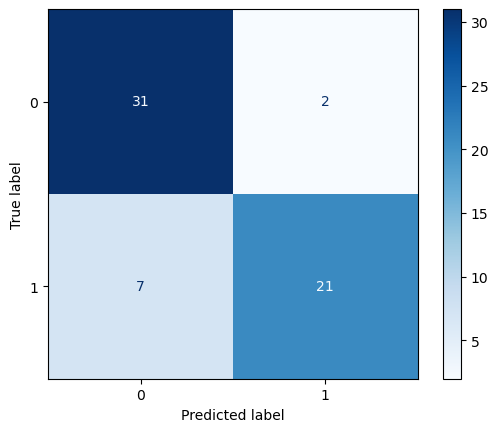

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred_lr)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred_lr)

## logistic Regression with RandomizedCV Search

In [302]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters grid
param_grid = {
    'C': np.logspace(-3, 3, 7),  # C: array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
    'penalty': ['l1', 'l2']  # penalty options
}

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Initialize RandomizedSearchCV
lr_randomcv = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)

def train_evaluate_lr_with_randomcv(X_train, X_test, y_train, y_test, randomcv_model):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the RandomizedSearchCV on the training data
    randomcv_model.fit(X_train_scaled, y_train)
    
    # Get the best estimator
    best_estimator = randomcv_model.best_estimator_
    
    # Predict the labels for the test data using the best estimator
    y_pred = best_estimator.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Best Parameters: {randomcv_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# For df2
df2_y_pred_lr_randomcv = train_evaluate_lr_with_randomcv(df2_X_train, df2_X_test, df2_y_train, df2_y_test, lr_randomcv)

# For transformed
transformed_y_pred_lr_randomcv = train_evaluate_lr_with_randomcv(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, lr_randomcv)


Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters: {'penalty': 'l2', 'C': 0.01}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters: {'penalty': 'l2', 'C': 0.01}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



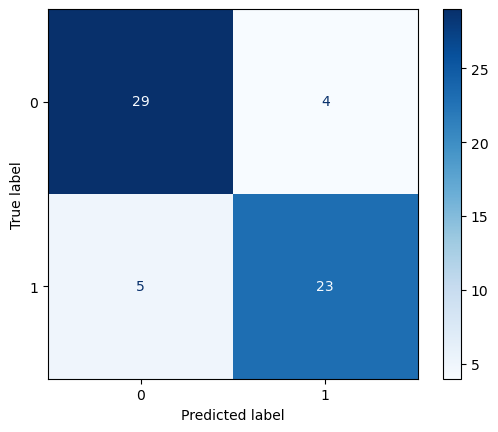

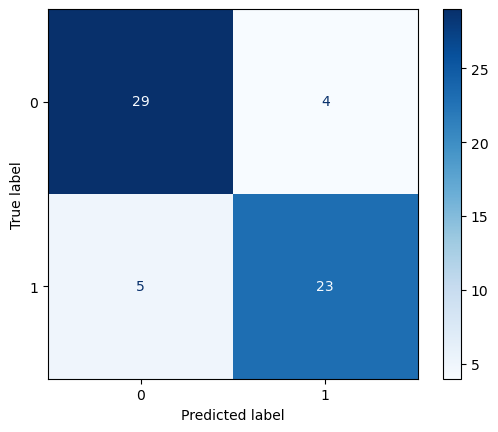

In [303]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred_lr_randomcv)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred_lr_randomcv)

## Ada-Boost without hype

In [304]:
from sklearn.ensemble import AdaBoostClassifier

def train_evaluate_adaboost(X_train, X_test, y_train, y_test):
    # Initialize the AdaBoost model with default parameters
    adaboost = AdaBoostClassifier()
    
    # Fit the model on the training data
    adaboost.fit(X_train, y_train)
    
    # Predict the labels for the test data
    y_pred = adaboost.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# For df2
df2_y_pred_adaboost = train_evaluate_adaboost(df2_X_train, df2_X_test, df2_y_train, df2_y_test)

# For transformed
transformed_y_pred_adaboost = train_evaluate_adaboost(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test)


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.84      0.75      0.79        28

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.84      0.75      0.79        28

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



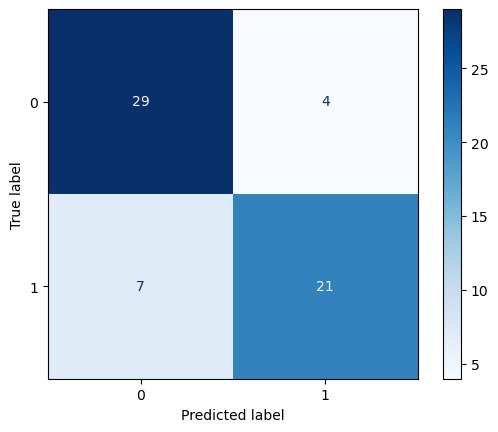

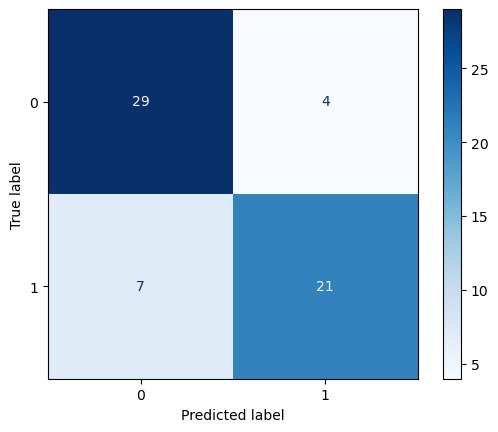

In [305]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred_adaboost)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred_adaboost)

## adaboost Regression with RandomizedCV Search

In [306]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the hyperparameters grid
param_grid = {
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__splitter': ['best', 'random'],
    'n_estimators': [1, 50]
}

# Initialize the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Initialize RandomizedSearchCV
adaboost_randomcv = RandomizedSearchCV(estimator=adaboost, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)

def train_evaluate_adaboost_with_randomcv(X_train, X_test, y_train, y_test, randomcv_model):
    # Fit the RandomizedSearchCV on the training data
    randomcv_model.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = randomcv_model.best_estimator_
    
    # Predict the labels for the test data using the best estimator
    y_pred = best_estimator.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)
    
    print(f"Best Parameters: {randomcv_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report_str)
    
    return y_pred

# For df2
df2_y_pred_adaboost_randomcv = train_evaluate_adaboost_with_randomcv(df2_X_train, df2_X_test, df2_y_train, df2_y_test, adaboost_randomcv)

# For transformed
transformed_y_pred_adaboost_randomcv = train_evaluate_adaboost_with_randomcv(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, adaboost_randomcv)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'n_estimators': 1, 'base_estimator__splitter': 'best', 'base_estimator__criterion': 'gini'}
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        33
           1       0.64      0.75      0.69        28

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'n_estimators': 1, 'base_estimator__splitter': 'random', 'base_estimator__criterion': 'entropy'}
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        33
           1       0.75      0.64      0.69        28

    accuracy                           0.74        61
   macro avg       0.74      0.73 

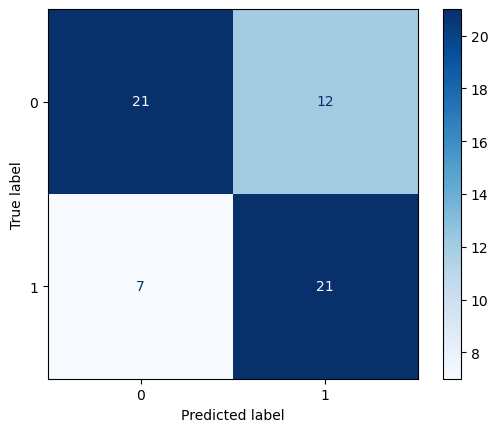

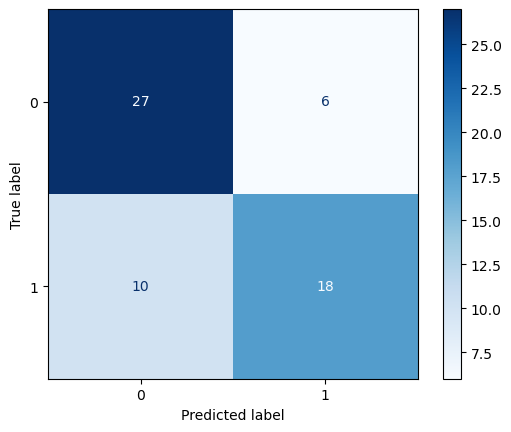

In [307]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
# Plot confusion matrix for df2
plot_confusion_matrix(df2_y_test, df2_y_pred_adaboost_randomcv)

# Plot confusion matrix for transformed
plot_confusion_matrix(transformed_y_test, transformed_y_pred_adaboost_randomcv)

In [308]:
%pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/275.7 kB 330.3 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/275.7 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/275.7 kB 469.7 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 722.1 kB/s eta 0:00:01
     ------------------------------- ------ 225.3/275.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=d1f514ea7d6f9955f8692adcff577fce62e6b90ae64a852e1a60f0688fd6a62a
  Stored in directory: c:\users\kpmh2\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [315]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(df2_X_train),
    feature_names=df2_X_train.columns,
    class_names=['0', '1'], # Check your class names in the CSV file. It should be 1, 2, 3, 4, 5 I think
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=df2_X_test.iloc[0],
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

NameError: name 'svm' is not defined

In [321]:
import lime
from lime import lime_tabular
def explain_svm_instance(X_train, y_train, X_test, class_idx, explainer_kwargs):
  # Train the SVM model
  svm = SVC()
  svm.fit(X_train, y_train)

  # Prepare LIME explainer
  explainer = lime_tabular.LimeTabularExplainer(
      training_data=X_train.to_numpy(),
      **explainer_kwargs  # Unpack additional explainer arguments
  )

  # Get the first test instance
  instance = X_test.iloc[0].values.reshape(1, -1)

  # Explain the prediction for the specified class
  exp = explainer.explain_instance(
      data_row=instance,
      predict_fn=lambda x: model.predict_proba(x)[:, class_idx]
  )
  
  return exp
exp.show_in_notebook(show_table=True)

NameError: name 'exp' is not defined